<a href="https://colab.research.google.com/github/Near32/SymbolicBehaviourBenchmark/blob/main/data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup :

In [1]:
!git clone https://github.com/Near32/SymbolicBehaviourBenchmark

Cloning into 'SymbolicBehaviourBenchmark'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 193 (delta 113), reused 122 (delta 50), pack-reused 0
Receiving objects: 100% (193/193), 379.69 KiB | 4.69 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [2]:
!pip install -e SymbolicBehaviourBenchmark/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/SymbolicBehaviourBenchmark
     |████████████████████████████████| 626 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.23.1-py3-none-any.whl size=701379 sha256=2dfab94b8db528d52380c000b8018019778183b576c1a2a6fcb0f7f861c7a373
  Stored in directory: /root/.cache/pip/wheels/e3/33/04/6723848e46f0f1ebe794bb329b7c761c3329a0d7ffade99da7
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
  Running setup.py develop for SymbolicBehaviourBenchmark


In [5]:
!pip install seaborn pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Gathering Data:

In [92]:
import pandas as pd
import numpy as np 

import symbolic_behaviour_benchmark
import gym

env_name = "SymbolicBehaviourBenchmark-ReceptiveConstructiveTestEnv-v0"
config = {
    "nbr_shots":1,
    "nbr_communication_rounds": 1,
    "vocab_size": 6,
    "max_sentence_length": 3,
    "descriptive": True,
    "nbr_latents": 3,
    "min_nbr_values_per_latent": 2,
    "max_nbr_values_per_latent": 3,
    "nbr_object_centric_samples": 16,
    "nbr_distractors": 0,
    "use_communication_channel_permutations": True,
    "allow_listener_query": False,
    "provide_listener_feedback": True,
    "sampling_strategy": "component-focused-2shots",
}

env = gym.make(env_name, **config)

In [93]:
env.unwrapped.__dict__

{'_np_random': RandomNumberGenerator(PCG64) at 0x7FC9D22B4350,
 'action_space': Dict(communication_channel:CommunicationChannel([7 7 7]), decision:Discrete(2)),
 'allow_listener_query': False,
 'communication_channel_action_space': CommunicationChannel([7 7 7]),
 'communication_channel_observation_space': CommunicationChannel([7 7 7]),
 'datasets': {'test': <symbolic_behaviour_benchmark.utils.dual_labeled_dataset.DualLabeledDataset at 0x7fc9c08dc3d0>,
  'train': <symbolic_behaviour_benchmark.utils.dual_labeled_dataset.DualLabeledDataset at 0x7fc9c08dcd50>},
 'decision_space': Discrete(2),
 'feedback_provided': False,
 'id_length': 10,
 'listener_feedback': True,
 'max_sentence_length': 3,
 'mode': 'train',
 'mode_id_observation_space': MultiBinary(2),
 'nbr_communication_rounds': 1,
 'nbr_distractors': 0,
 'nbr_latents': 3,
 'nbr_players': 2,
 'nbr_shots': 1,
 'observation_space': Dict(communication_channel:CommunicationChannel([7 7 7]), mode_id:MultiBinary(2), other_agent_id:Box(0, 25

In [94]:
env.unwrapped.rg_config

{'curriculum_distractors_window_size': 25,
 'descriptive': True,
 'descriptive_target_ratio': 0.5,
 'distractor_sampling': 'uniform',
 'graphtype': 'reinforce-like',
 'gumbel_softmax_eps': 1e-06,
 'max_sentence_length': 3,
 'nbr_communication_rounds': 1,
 'nbr_distractors': 0,
 'nbr_experience_repetition': 1,
 'nbr_latents': 3,
 'nbr_stimulus': 1,
 'object_centric': True,
 'observability': 'full',
 'tau0': 0.2,
 'unsupervised_segmentation_factor': None,
 'use_curriculum_nbr_distractors': False,
 'vocab_size': 6}

In [95]:
env.action_space

Dict(communication_channel:CommunicationChannel([7 7 7]), decision:Discrete(2))

In [96]:
env.observation_space

Dict(communication_channel:CommunicationChannel([7 7 7]), mode_id:MultiBinary(2), other_agent_id:Box(0, 255, (10,), uint8), previous_game_result:MultiBinary(2), previous_game_reward:Box(-10.0, 10.0, (1,), float32), role_id:MultiBinary(2), stimulus:Box(-1.0, 1.0, (3,), float32))

In [97]:
samples = []
dimensions = []
steps = []
values = []

obs, info = env.reset()

done = False
iteration = 0
while not done:
    iteration += 1
    speaker_action = env.action_space.sample()
    listener_action = env.action_space.sample()
    action = (speaker_action, listener_action)
    obs, rewards, done, infos = env.step(action)
    samples.append({'obs':obs, 'r':rewards, 'done':done, 'infos':infos})
    if infos[0]['round_idx'] == -1:
        for lidx, value in enumerate(obs[0]["stimulus"]):
            dimensions.append(lidx)
            values.append(value.item())
            steps.append(iteration)


/usr/local/lib/python3.7/dist-packages/gym/utils/seeding.py:28: DeprecationWarning: WARN: Function `rng.rand(*size)` is marked as deprecated and will be removed in the future. Please use `Generator.random(size)` instead.
  "Function `rng.rand(*size)` is marked as deprecated "


In [98]:
print(len(steps))

99


In [99]:
print(values)

[-0.5761359930038452, -0.6658947467803955, 0.5736830830574036, 0.009499067440629005, -0.710368812084198, -0.7344562411308289, -0.6285693049430847, 0.7146298289299011, -0.5238283276557922, 0.7315198183059692, -0.6640093922615051, 0.6911543011665344, 0.6541483402252197, 0.4955175518989563, -0.27727052569389343, 0.7494813203811646, 0.7210580110549927, -0.7344562411308289, 0.7315198183059692, -0.6640093922615051, -0.44731298089027405, 0.028133321553468704, -0.5864935517311096, -0.7374950647354126, 0.02328011766076088, 0.5900606513023376, -0.32472893595695496, -0.684291422367096, 0.5900606513023376, 0.25052136182785034, 0.07621955871582031, -0.42961108684539795, 0.5152338147163391, 0.17565520107746124, 0.8162623047828674, 0.6911543011665344, -0.6095768809318542, 0.5556772351264954, 0.31164678931236267, 0.028133321553468704, 0.7302768230438232, 0.6444610953330994, -0.005272923037409782, 0.6579393744468689, -0.524669885635376, -0.005272923037409782, 0.6579393744468689, -0.524669885635376, -0.

In [100]:
df = pd.DataFrame(dict(
    dimensions=dimensions, 
    stimulus=values,
    steps=steps,
    x=[0 for _ in range(len(steps))],
))

In [101]:
df.describe()

,dimensions,stimulus,steps,x
count,99.000000,99.000000,99.000000,99.0
mean,1.000000,0.144939,50.000000,0.0
std,0.820652,0.545617,28.711087,0.0
min,0.000000,-0.849870,2.000000,0.0
25%,0.000000,-0.438462,26.000000,0.0
50%,1.000000,0.250521,50.000000,0.0
75%,2.000000,0.656044,74.000000,0.0
max,2.000000,0.872452,98.000000,0.0


# Visualisation :

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


'\ngrid.plot_marginals(\n    sns.rugplot, \n    height=1, \n    color="g", \n    alpha=.6,\n)\n'

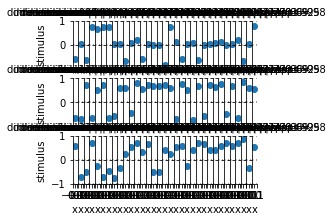

In [103]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(
    df, 
    col="steps", 
    row="dimensions", 
    palette="tab20c",
    #col_wrap=4, 
    height=1,
    aspect=0.1,
    sharey=True,
    sharex=True,
    despine=True,
)

# Draw a horizontal line to show the starting point
grid.refline(y=-1, linestyle=":")
grid.refline(y=0, linestyle=":")
grid.refline(y=1, linestyle=":")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.scatter, "x", "stimulus", marker="o")

# Adjust the tick positions and labels
grid.set(
    #xticks=np.arange(5), 
    #yticks=[-3, 3],
    xlim=(-0.1, 0.1), 
    ylim=(-1.0, 1.0),
)

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

"""
grid.plot_marginals(
    sns.rugplot, 
    height=1, 
    color="g", 
    alpha=.6,
)
"""

In [75]:
g = sns.JointGrid(
    data=df, 
    x="steps", 
    y="stimulus", 
    col="dimensions",
    #row="dimensions",
    #col="steps",
    space=0, 
    ratio=17,
)
g.plot_joint(
    sns.scatterplot, 
    size=20,#mpg["horsepower"], 
    #sizes=(30, 120),
    color="g", 
    alpha=.6, 
    legend=False,
)

g.plot_marginals(
    sns.rugplot, 
    height=1, 
    color="g", 
    alpha=.6,
)

TypeError: ignored